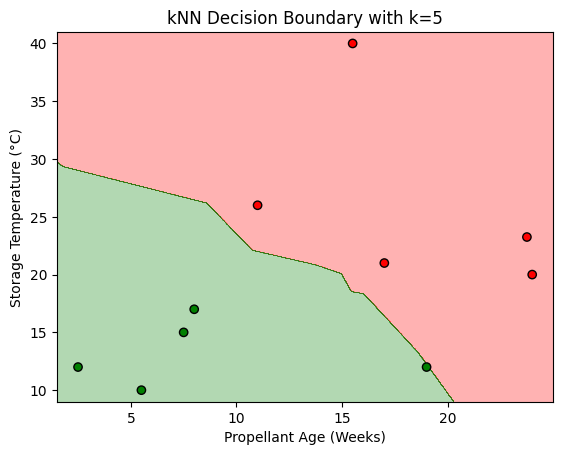

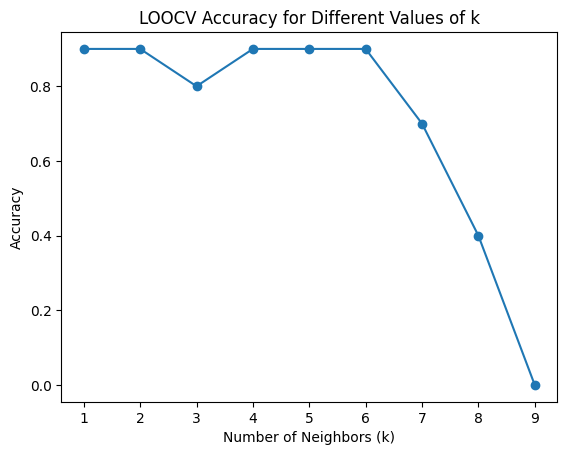

The optimum value of k is 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Data Preparation
X = np.array([[15.5, 40], [23.75, 23.25], [8, 17], [17, 21], [5.5, 10], 
              [19, 12], [24, 20], [2.5, 12], [7.5, 15], [11, 26]])
y = np.array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0])  # 0 for fail, 1 for pass

# Define the function to plot decision boundary
def plot_decision_boundary(X, y, clf, ax):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red', 'green']))
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['red', 'green']))
    ax.set_xlabel('Propellant Age (Weeks)')
    ax.set_ylabel('Storage Temperature (°C)')
    ax.set_title(f'kNN Decision Boundary with k={clf.n_neighbors}')

# kNN Classification with k=5
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# Plotting the decision boundary
fig, ax = plt.subplots()
plot_decision_boundary(X, y, knn, ax)
plt.show()

# Leave-One-Out Cross-Validation (LOOCV)
loo = LeaveOneOut()
accuracies = []
k_range = range(1, len(X))

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    fold_accuracies = []
    
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        fold_accuracies.append(accuracy_score(y_test, y_pred))
    
    accuracies.append(np.mean(fold_accuracies))

# Plot LOOCV results
plt.plot(k_range, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('LOOCV Accuracy for Different Values of k')
plt.show()

# Print the optimum value of k
optimum_k = k_range[np.argmax(accuracies)]
print(f'The optimum value of k is {optimum_k}')

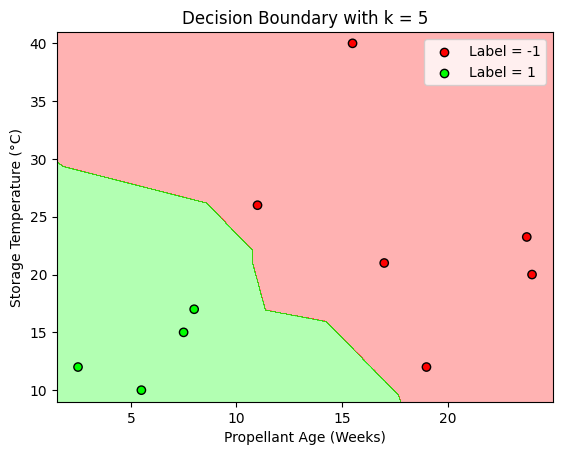

LOOCV Accuracy with k = 5: 1.000
Optimal k: 1


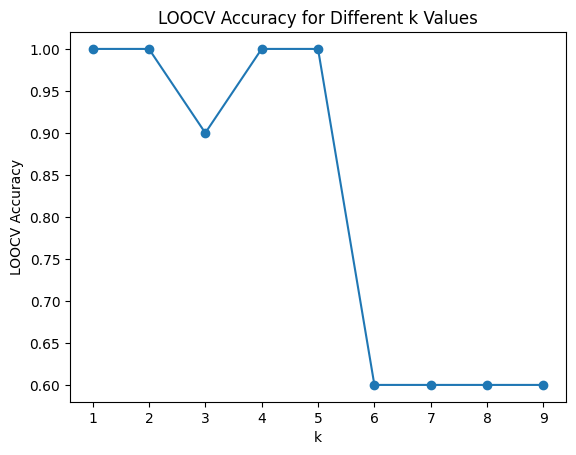

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Dataset: (age, temperature, pass/fail, present in knn or not)
dataset = np.array([[15.5, 40, -1], [23.75, 23.25, -1], [8, 17, 1], 
                    [17, 21, -1], [5.5, 10, 1], [19, 12, -1], 
                    [24, 20, -1], [2.5, 12, 1], [7.5, 15, 1], 
                    [11, 26, -1]])

# Features and labels
features = dataset[:, :2]
labels = dataset[:, 2]

# Create and fit kNN classifier with k=5
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(features, labels)

# Define bounds for mesh grid
min_x, min_y = features.min(axis=0) - 1
max_x, max_y = features.max(axis=0) + 1

# Create mesh grid
resolution_x = (max_x - min_x) / 1920
resolution_y = (max_y - min_y) / 1080
values_x = np.arange(min_x, max_x, resolution_x)
values_y = np.arange(min_y, max_y, resolution_y)
xx, yy = np.meshgrid(values_x, values_y)

# Predict using the trained kNN model
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure()

# Define vibrant colors for decision regions
vibrant_red = '#FF0000'  # Bright Red
vibrant_green = '#00FF00'  # Bright Green

# Create a colormap with vibrant colors
cmap = ListedColormap([vibrant_red, vibrant_green])

# Create the contour plot with the custom colormap for decision boundaries
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

# Scatter plot with original colors for data points
plt.scatter(features[:, 0], features[:, 1], c=labels, edgecolor='k', cmap=ListedColormap([vibrant_red, vibrant_green]))

# Create a custom legend
plt.scatter([], [], c=vibrant_red, edgecolor='k', label='Label = -1', marker='o')
plt.scatter([], [], c=vibrant_green, edgecolor='k', label='Label = 1', marker='o')

# Add legend
plt.legend()

# Labels and title
plt.xlabel('Propellant Age (Weeks)')
plt.ylabel('Storage Temperature (°C)')
plt.title(f'Decision Boundary with k = {k}')

# Show the plot
plt.show()

# Leave-One-Out Cross-Validation (LOOCV)
loo = LeaveOneOut()
accuracy = []
for train_index, test_index in loo.split(features):
    f_train, f_test = features[train_index], features[test_index]
    l_train, l_test = labels[train_index], labels[test_index]
    knn.fit(f_train, l_train)
    l_pred = knn.predict(f_test)
    accuracy.append(accuracy_score(l_test, l_pred))

average_accuracy = np.mean(accuracy)
print(f'LOOCV Accuracy with k = {k}: {average_accuracy:.3f}')

# Find the optimal k
accuracies = []
k_values = range(1, 10)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy = []
    for train_index, test_index in loo.split(features):
        f_train, f_test = features[train_index], features[test_index]
        l_train, l_test = labels[train_index], labels[test_index]
        knn.fit(f_train, l_train)
        l_pred = knn.predict(f_test)
        accuracy.append(accuracy_score(l_test, l_pred))
    accuracies.append(np.mean(accuracy))

optimal_k = k_values[np.argmax(accuracies)]
print(f'Optimal k: {optimal_k}')

# Plot LOOCV accuracy for different k values
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('LOOCV Accuracy')
plt.title('LOOCV Accuracy for Different k Values')
plt.show()


Optimal k: 1, Best Accuracy: 0.9


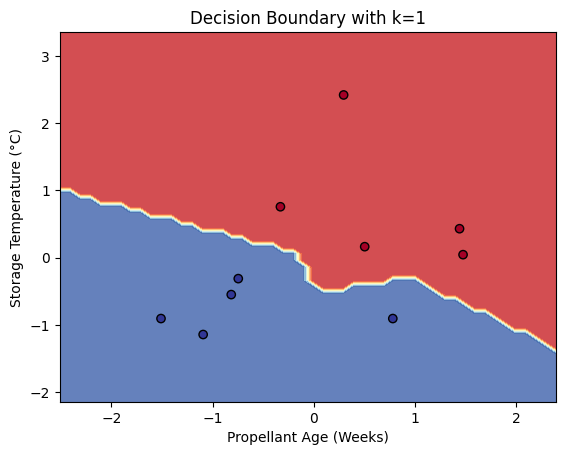

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler

# Sample Data
X = np.array([[15.5, 40],
              [23.75, 23.25],
              [8, 17],
              [17, 21],
              [5.5, 10],
              [19, 12],
              [24, 20],
              [2.5, 12],
              [7.5, 15],
              [11, 26]])

y = np.array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0])  # 0: fail, 1: pass

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# kNN and LOOCV
def find_optimal_k(X, y, max_k):
    loo = LeaveOneOut()
    best_k = 1
    best_score = 0

    for k in range(1, max_k + 1):
        model = KNeighborsClassifier(n_neighbors=k)
        scores = []
        
        for train_index, test_index in loo.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            model.fit(X_train, y_train)
            prediction = model.predict(X_test)
            scores.append(prediction == y_test)
        
        accuracy = np.mean(scores)
        if accuracy > best_score:
            best_score = accuracy
            best_k = k
    
    return best_k, best_score

# Find optimal k
optimal_k, best_accuracy = find_optimal_k(X_scaled, y, max_k=9)
print(f'Optimal k: {optimal_k}, Best Accuracy: {best_accuracy}')

# Plot Decision Boundary
def plot_decision_boundary(X, y, k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='RdYlBu')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='RdYlBu')
    plt.xlabel('Propellant Age (Weeks)')
    plt.ylabel('Storage Temperature (°C)')
    plt.title(f'Decision Boundary with k={k}')
    plt.show()

# Plot with optimal k
plot_decision_boundary(X_scaled, y, optimal_k)


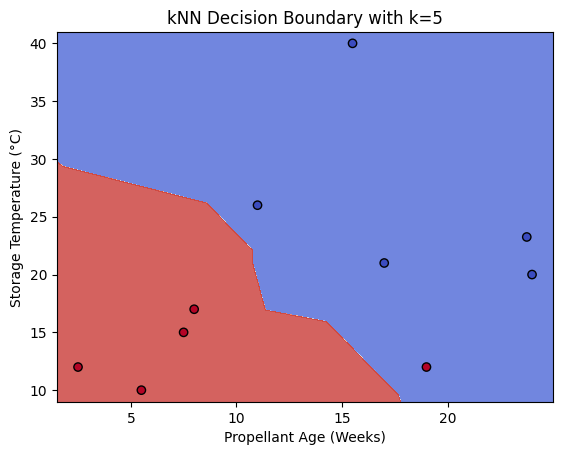

LOOCV Accuracy with k = 1: 1.000
LOOCV Accuracy with k = 2: 1.000
LOOCV Accuracy with k = 3: 1.000
LOOCV Accuracy with k = 4: 1.000
LOOCV Accuracy with k = 5: 1.000
LOOCV Accuracy with k = 6: 1.000
LOOCV Accuracy with k = 7: 1.000
LOOCV Accuracy with k = 8: 1.000
LOOCV Accuracy with k = 9: 1.000
Optimal k: 1


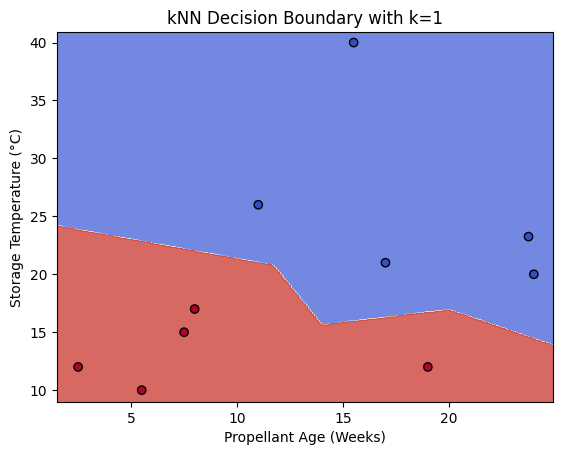

Optimal k: 1


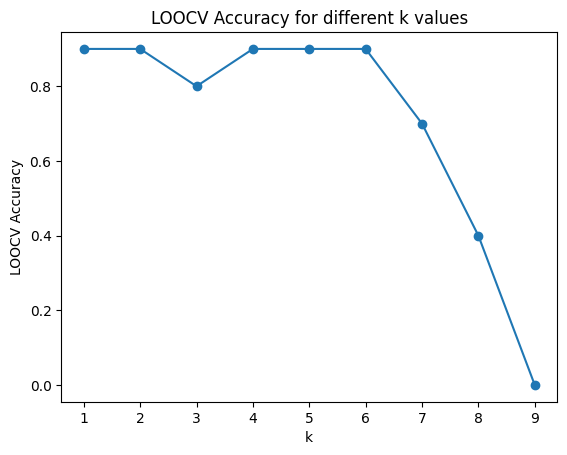

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

# Define the dataset
data = np.array([
    [15.5, 40, 0],
    [23.75, 23.25, 0],
    [8, 17, 1],
    [17, 21, 0],
    [5.5, 10, 1],
    [19, 12, 1],
    [24, 20, 0],
    [2.5, 12, 1],
    [7.5, 15, 1],
    [11, 26, 0]
])

X = data[:, :2]  # Features: age and temperature
y = data[:, 2]   # Labels: pass/fail
# Features and labels
features=dataset[:, :2]
labels=dataset[:, 2]

# Create a kNN classifier with 5 neighbors
k=5
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model
knn.fit(features, labels)

min_x=features[0][0]
min_y=features[0][1]
max_x=features[0][0]
max_y=features[0][1]
for it in dataset:
    min_x=min(min_x,it[0])
    min_y=min(min_y,it[1])
    max_x=max(max_x,it[0])
    max_y=max(max_y,it[1])
#print(min_x)
#print(min_y)
#print(max_x)
#print(max_y)
min_x=min_x-1
min_y=min_y-1
max_x=max_x+1
max_y=max_y+1

resolution_x=(max_x-min_x)/1920
resolution_y=(max_y-min_y)/1080

values_x=[]
values_y=[]
for i in range(int((max_x-min_x)/resolution_x)):
    values_x.append(min_x+i*resolution_x)
for i in range(int((max_y-min_y)/resolution_y)):
    values_y.append(min_y+i*resolution_y)

# Create a mesh grid
xx, yy = np.meshgrid(values_x, values_y)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=plt.cm.coolwarm)
plt.xlabel('Propellant Age (Weeks)')
plt.ylabel('Storage Temperature (°C)')
plt.title(f'kNN Decision Boundary with k={5}')
plt.show()

# Function to perform LOOCV and return accuracy
def loocv_kNN(k, X, y):
    loo = LeaveOneOut()
    accuracies = []
    
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    
    average_accuracies = np.mean(accuracies)
    print(f'LOOCV Accuracy with k = {k}: {average_accuracy:.3f}')
    return np.mean(accuracies)

# Test different k values to find the optimum
k_values = range(1, 10)
accuracies = [loocv_kNN(k, X, y) for k in k_values]

# Find the optimal k
optimal_k = k_values[np.argmax(accuracies)]
print(f"Optimal k: {optimal_k}")

# Train the model with the optimal k
model = KNeighborsClassifier(n_neighbors=optimal_k)
model.fit(X, y)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=plt.cm.coolwarm)
plt.xlabel('Propellant Age (Weeks)')
plt.ylabel('Storage Temperature (°C)')
plt.title(f'kNN Decision Boundary with k={optimal_k}')
plt.show()

optimal_k = k_values[np.argmax(accuracies)]
print(f'Optimal k: {optimal_k}')
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('LOOCV Accuracy')
plt.title('LOOCV Accuracy for different k values')
plt.show()

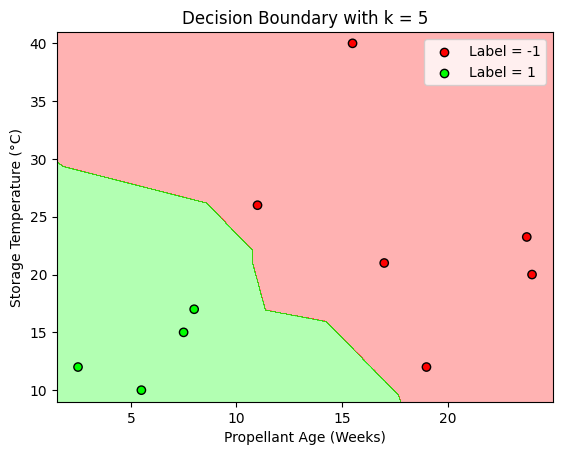

C:\Users\Harsh\AppData\Local\Temp\ipykernel_3784\2174378470.py:80: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correct_predictions += int(l_pred == l_test)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_3784\2174378470.py:80: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correct_predictions += int(l_pred == l_test)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_3784\2174378470.py:80: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correct_predictions += int(l_pred == l_t

LOOCV Accuracy with k = 5: 1.000


C:\Users\Harsh\AppData\Local\Temp\ipykernel_3784\2174378470.py:97: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correct_predictions += int(l_pred == l_test)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_3784\2174378470.py:97: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correct_predictions += int(l_pred == l_test)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_3784\2174378470.py:97: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correct_predictions += int(l_pred == l_t

Optimal k: 1


C:\Users\Harsh\AppData\Local\Temp\ipykernel_3784\2174378470.py:97: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correct_predictions += int(l_pred == l_test)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_3784\2174378470.py:97: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correct_predictions += int(l_pred == l_test)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_3784\2174378470.py:97: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correct_predictions += int(l_pred == l_t

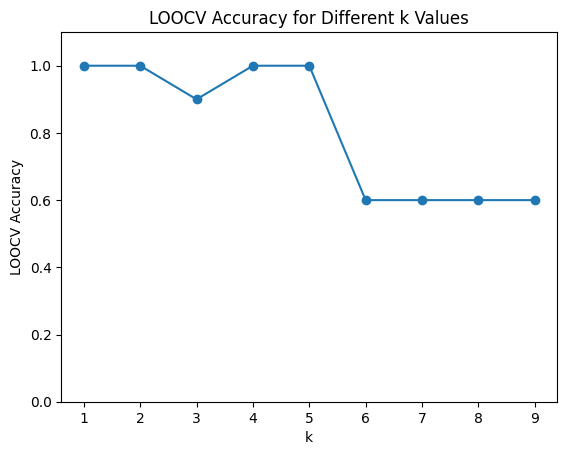

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Dataset: (age, temperature, pass/fail)
dataset = np.array([[15.5, 40, -1], [23.75, 23.25, -1], [8, 17, 1], 
                    [17, 21, -1], [5.5, 10, 1], [19, 12, -1], 
                    [24, 20, -1], [2.5, 12, 1], [7.5, 15, 1], 
                    [11, 26, -1]])

# Features and labels
features = dataset[:, :2]
labels = dataset[:, 2]

# Create and fit kNN classifier with k=5
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(features, labels)

# Define bounds for mesh grid
min_x, min_y = features.min(axis=0) - 1
max_x, max_y = features.max(axis=0) + 1

# Create mesh grid
resolution_x = (max_x - min_x) / 1920
resolution_y = (max_y - min_y) / 1080
values_x = np.arange(min_x, max_x, resolution_x)
values_y = np.arange(min_y, max_y, resolution_y)
xx, yy = np.meshgrid(values_x, values_y)

# Predict using the trained kNN model
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure()

# Define vibrant colors for decision regions
vibrant_red = '#FF0000'  # Bright Red
vibrant_green = '#00FF00'  # Bright Green

# Create a colormap with vibrant colors
cmap = ListedColormap([vibrant_red, vibrant_green])

# Create the contour plot with the custom colormap for decision boundaries
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

# Scatter plot with original colors for data points
plt.scatter(features[:, 0], features[:, 1], c=labels, edgecolor='k', cmap=ListedColormap([vibrant_red, vibrant_green]))

# Create a custom legend
plt.scatter([], [], c=vibrant_red, edgecolor='k', label='Label = -1', marker='o')
plt.scatter([], [], c=vibrant_green, edgecolor='k', label='Label = 1', marker='o')

# Add legend
plt.legend()

# Labels and title
plt.xlabel('Propellant Age (Weeks)')
plt.ylabel('Storage Temperature (°C)')
plt.title(f'Decision Boundary with k = {k}')

# Show the plot
plt.show()



# Leave-One-Out Cross-Validation (LOOCV)
loo = LeaveOneOut()
correct_predictions = 0

for train_index, test_index in loo.split(features):
    f_train, f_test = features[train_index], features[test_index]
    l_train, l_test = labels[train_index], labels[test_index]
    knn.fit(f_train, l_train)
    l_pred = knn.predict(f_test)
    correct_predictions += int(l_pred == l_test)

average_accuracy = correct_predictions / len(features)
print(f'LOOCV Accuracy with k = {k}: {average_accuracy:.3f}')

# Find the optimal k
accuracies = []
k_values = range(1, 10)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    correct_predictions = 0
    for train_index, test_index in loo.split(features):
        f_train, f_test = features[train_index], features[test_index]
        l_train, l_test = labels[train_index], labels[test_index]
        knn.fit(f_train, l_train)
        l_pred = knn.predict(f_test)
        correct_predictions += int(l_pred == l_test)
    accuracies.append(correct_predictions / len(features))

optimal_k = k_values[np.argmax(accuracies)]
print(f'Optimal k: {optimal_k}')

# Plot LOOCV accuracy for different k values
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('LOOCV Accuracy')
plt.title('LOOCV Accuracy for Different k Values')
plt.ylim(0, max(accuracies) + 0.1)  # Set the y-axis to start from 0 and add some padding at the top
plt.show()



C:\Users\Harsh\AppData\Local\Temp\ipykernel_3784\1404641540.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correct_predictions += int(y_pred == y_test)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_3784\1404641540.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correct_predictions += int(y_pred == y_test)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_3784\1404641540.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correct_predictions += int(y_pred == y_t

Optimal k: 1


C:\Users\Harsh\AppData\Local\Temp\ipykernel_3784\1404641540.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correct_predictions += int(y_pred == y_test)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_3784\1404641540.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correct_predictions += int(y_pred == y_test)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_3784\1404641540.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correct_predictions += int(y_pred == y_t

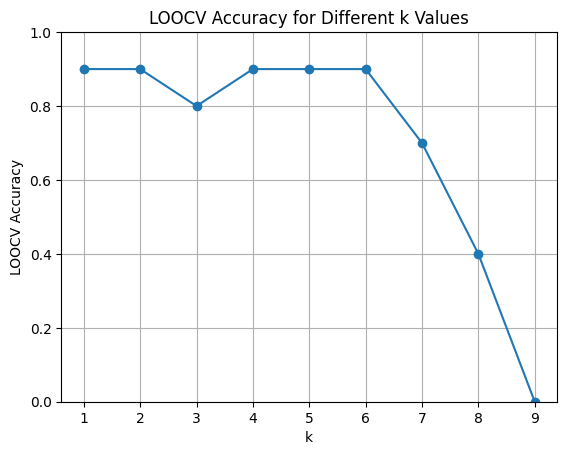

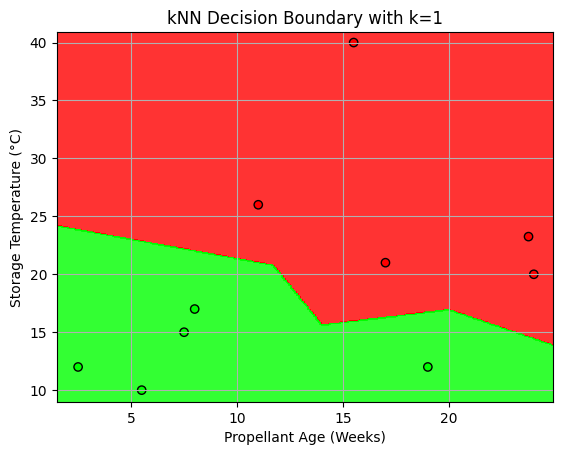

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Define the dataset
dataset = np.array([
    [15.5, 40, 0],
    [23.75, 23.25, 0],
    [8, 17, 1],
    [17, 21, 0],
    [5.5, 10, 1],
    [19, 12, 1],
    [24, 20, 0],
    [2.5, 12, 1],
    [7.5, 15, 1],
    [11, 26, 0]
])

X = dataset[:, :2]  # Features: age and temperature
y = dataset[:, 2]   # Labels: pass/fail

# Function to perform LOOCV and return accuracy
def loocv_kNN(k, X, y):
    loo = LeaveOneOut()
    correct_predictions = 0
    
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        correct_predictions += int(y_pred == y_test)
    
    accuracy = correct_predictions / len(X)
    return accuracy

# Test different k values to find the optimum
k_values = range(1, 10)
accuracies = [loocv_kNN(k, X, y) for k in k_values]

# Find the optimal k
optimal_k = k_values[np.argmax(accuracies)]
print(f"Optimal k: {optimal_k}")

# Plot LOOCV accuracy for different k values
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('LOOCV Accuracy')
plt.title('LOOCV Accuracy for Different k Values')
plt.ylim(0, max(accuracies) + 0.1)  # Set the y-axis to start from 0 and add some padding at the top
plt.grid(True)
plt.show()

# Train the model with the optimal k
model = KNeighborsClassifier(n_neighbors=optimal_k)
model.fit(X, y)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define vibrant colors for decision regions
vibrant_red = '#FF0000'  # Bright Red
vibrant_green = '#00FF00'  # Bright Green

# Create a colormap with vibrant colors
cmap = ListedColormap([vibrant_red, vibrant_green])

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=cmap)
plt.xlabel('Propellant Age (Weeks)')
plt.ylabel('Storage Temperature (°C)')
plt.title(f'kNN Decision Boundary with k={optimal_k}')
plt.grid(True)
plt.show()


C:\Users\Harsh\AppData\Local\Temp\ipykernel_3784\1088883548.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correct_predictions += int(y_pred == y_test)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_3784\1088883548.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correct_predictions += int(y_pred == y_test)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_3784\1088883548.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correct_predictions += int(y_pred == y_t

Optimal k: 1


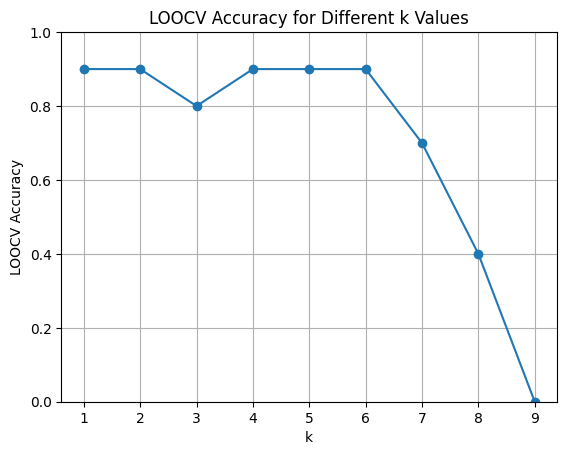

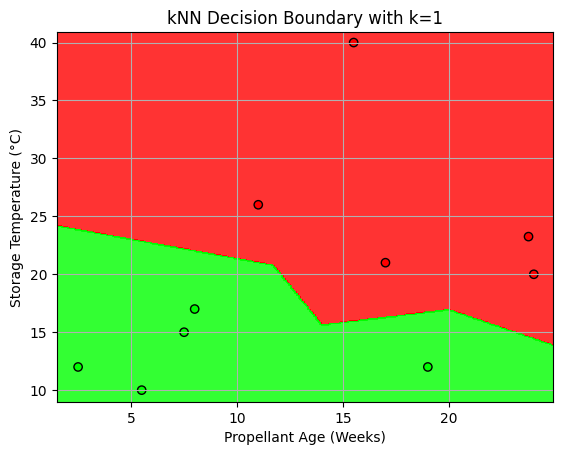

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Define the dataset
dataset = np.array([
    [15.5, 40, 0],
    [23.75, 23.25, 0],
    [8, 17, 1],
    [17, 21, 0],
    [5.5, 10, 1],
    [19, 12, 1],
    [24, 20, 0],
    [2.5, 12, 1],
    [7.5, 15, 1],
    [11, 26, 0]
])

X = dataset[:, :2]  # Features: age and temperature
y = dataset[:, 2]   # Labels: pass/fail

# Function to perform LOOCV and return accuracy
def loocv_kNN(k, X, y):
    loo = LeaveOneOut()
    correct_predictions = 0
    
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        correct_predictions += int(y_pred == y_test)
    
    accuracy = correct_predictions / len(X)
    return accuracy

# Test different k values to find the optimum
k_values = range(1, 10)
accuracies = [loocv_kNN(k, X, y) for k in k_values]

# Find the optimal k
optimal_k = k_values[np.argmax(accuracies)]
print(f"Optimal k: {optimal_k}")

# Plot LOOCV accuracy for different k values
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('LOOCV Accuracy')
plt.title('LOOCV Accuracy for Different k Values')
plt.ylim(0, 1)  # Set the y-axis to start from 0 to 1
plt.grid(True)
plt.show()

# Train the model with the optimal k
model = KNeighborsClassifier(n_neighbors=optimal_k)
model.fit(X, y)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define vibrant colors for decision regions
vibrant_red = '#FF0000'  # Bright Red
vibrant_green = '#00FF00'  # Bright Green

# Create a colormap with vibrant colors
cmap = ListedColormap([vibrant_red, vibrant_green])

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=cmap)
plt.xlabel('Propellant Age (Weeks)')
plt.ylabel('Storage Temperature (°C)')
plt.title(f'kNN Decision Boundary with k={optimal_k}')
plt.grid(True)
plt.show()


LOOCV Accuracy with k = 5: 0.900


C:\Users\Harsh\AppData\Local\Temp\ipykernel_3784\603623384.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correct_predictions += int(y_pred == y_test)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_3784\603623384.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correct_predictions += int(y_pred == y_test)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_3784\603623384.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correct_predictions += int(y_pred == y_test

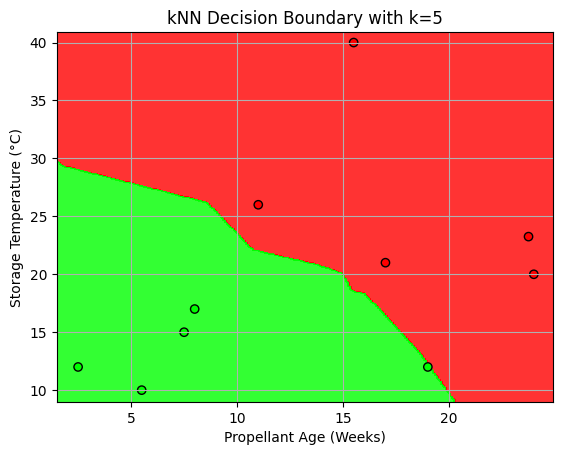

C:\Users\Harsh\AppData\Local\Temp\ipykernel_3784\603623384.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correct_predictions += int(y_pred == y_test)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_3784\603623384.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correct_predictions += int(y_pred == y_test)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_3784\603623384.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correct_predictions += int(y_pred == y_test

Optimal k: 1


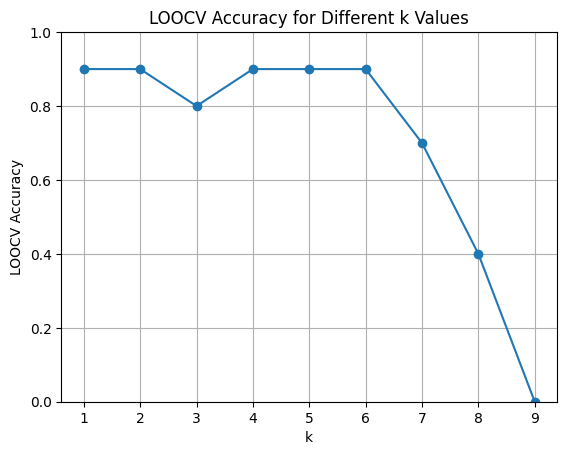

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Define the dataset
dataset = np.array([
    [15.5, 40, 0],
    [23.75, 23.25, 0],
    [8, 17, 1],
    [17, 21, 0],
    [5.5, 10, 1],
    [19, 12, 1],
    [24, 20, 0],
    [2.5, 12, 1],
    [7.5, 15, 1],
    [11, 26, 0]
])

X = dataset[:, :2]  # Features: age and temperature
y = dataset[:, 2]   # Labels: pass/fail

# Function to perform LOOCV and return accuracy
def loocv_kNN(k, X, y):
    loo = LeaveOneOut()
    correct_predictions = 0
    
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        correct_predictions += int(y_pred == y_test)
    
    accuracy = correct_predictions / len(X)
    return accuracy

# LOOCV accuracy for k=5
k = 5
accuracy_k5 = loocv_kNN(k, X, y)
print(f'LOOCV Accuracy with k = {k}: {accuracy_k5:.3f}')

# Train the model with k=5
model_k5 = KNeighborsClassifier(n_neighbors=k)
model_k5.fit(X, y)

# Plot decision boundary for k=5
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model_k5.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define vibrant colors for decision regions
vibrant_red = '#FF0000'  # Bright Red
vibrant_green = '#00FF00'  # Bright Green

# Create a colormap with vibrant colors
cmap = ListedColormap([vibrant_red, vibrant_green])

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=cmap)
plt.xlabel('Propellant Age (Weeks)')
plt.ylabel('Storage Temperature (°C)')
plt.title(f'kNN Decision Boundary with k={k}')
plt.grid(True)
plt.show()

# Find the optimal k
k_values = range(1, 10)
accuracies = [loocv_kNN(k, X, y) for k in k_values]

optimal_k = k_values[np.argmax(accuracies)]
print(f"Optimal k: {optimal_k}")

# Plot LOOCV accuracy for different k values
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('LOOCV Accuracy')
plt.title('LOOCV Accuracy for Different k Values')
plt.ylim(0, 1)  # Set the y-axis to start from 0 to 1
plt.grid(True)
plt.show()


LOOCV Accuracy with k = 5: 0.900


C:\Users\Harsh\AppData\Local\Temp\ipykernel_3784\4137179030.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correct_predictions += int(y_pred == y_test)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_3784\4137179030.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correct_predictions += int(y_pred == y_test)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_3784\4137179030.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correct_predictions += int(y_pred == y_t

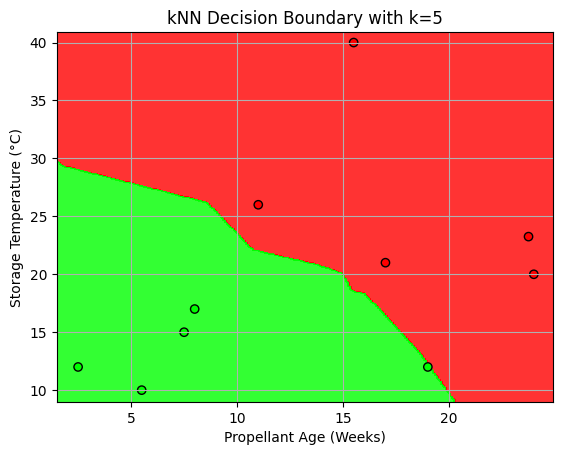

C:\Users\Harsh\AppData\Local\Temp\ipykernel_3784\4137179030.py:84: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correct_predictions += int(y_pred == y_test)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_3784\4137179030.py:84: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correct_predictions += int(y_pred == y_test)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_3784\4137179030.py:84: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  correct_predictions += int(y_pred == y_t

Optimal k: 1


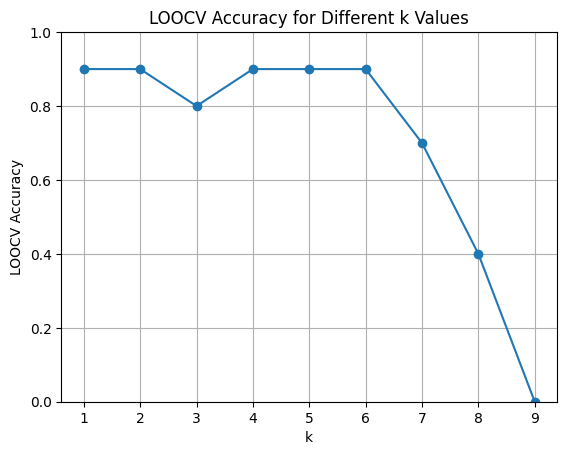

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Define the dataset
dataset = np.array([
    [15.5, 40, 0],
    [23.75, 23.25, 0],
    [8, 17, 1],
    [17, 21, 0],
    [5.5, 10, 1],
    [19, 12, 1],
    [24, 20, 0],
    [2.5, 12, 1],
    [7.5, 15, 1],
    [11, 26, 0]
])

X = dataset[:, :2]  # Features: age and temperature
y = dataset[:, 2]   # Labels: pass/fail

# LOOCV Accuracy Calculation for k=5
k = 5
loo = LeaveOneOut()
correct_predictions = 0

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    correct_predictions += int(y_pred == y_test)

accuracy_k5 = correct_predictions / len(X)
print(f'LOOCV Accuracy with k = {k}: {accuracy_k5:.3f}')

# Train the model with k=5
model_k5 = KNeighborsClassifier(n_neighbors=k)
model_k5.fit(X, y)

# Plot decision boundary for k=5
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model_k5.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define vibrant colors for decision regions
vibrant_red = '#FF0000'  # Bright Red
vibrant_green = '#00FF00'  # Bright Green

# Create a colormap with vibrant colors
cmap = ListedColormap([vibrant_red, vibrant_green])

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=cmap)
plt.xlabel('Propellant Age (Weeks)')
plt.ylabel('Storage Temperature (°C)')
plt.title(f'kNN Decision Boundary with k={k}')
plt.grid(True)
plt.show()

# Find the optimal k
k_values = range(1, 10)
accuracies = []

for k in k_values:
    correct_predictions = 0
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        correct_predictions += int(y_pred == y_test)
    
    accuracy = correct_predictions / len(X)
    accuracies.append(accuracy)

# Find the optimal k
optimal_k = k_values[np.argmax(accuracies)]
print(f'Optimal k: {optimal_k}')

# Plot LOOCV accuracy for different k values
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('LOOCV Accuracy')
plt.title('LOOCV Accuracy for Different k Values')
plt.ylim(0, 1)  # Set the y-axis to start from 0 to 1
plt.grid(True)
plt.show()



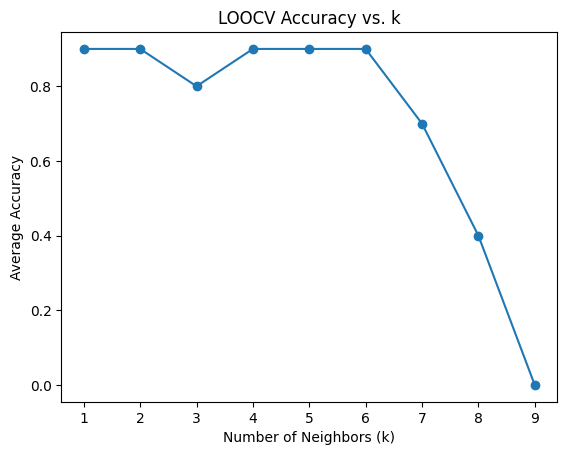

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

# Data and labels
X = np.array([[15.5, 40], [23.75, 23.25], [8, 17], [17, 21], [5.5, 10],
              [19, 12], [24, 20], [2.5, 12], [7.5, 15], [11, 26]])
y = np.array(['fail', 'fail', 'pass', 'fail', 'pass', 'pass', 'fail', 'pass', 'pass', 'fail'])

# LOOCV for different k values
k_values = range(1, 10)  # Test k values from 1 to 9
accuracies = []

for k in k_values:
    loo = LeaveOneOut()
    model = KNeighborsClassifier(n_neighbors=k)
    y_true = []
    y_pred = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred.append(model.predict(X_test)[0])
        y_true.append(y_test[0])
    accuracy = accuracy_score(y_true, y_pred)
    accuracies.append(accuracy)

# Plotting
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average Accuracy')
plt.title('LOOCV Accuracy vs. k')
plt.show()



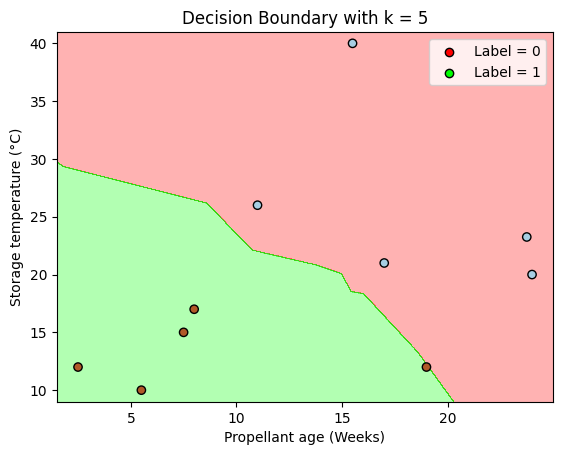

LOOCV Accuracy with k = 5: 0.900


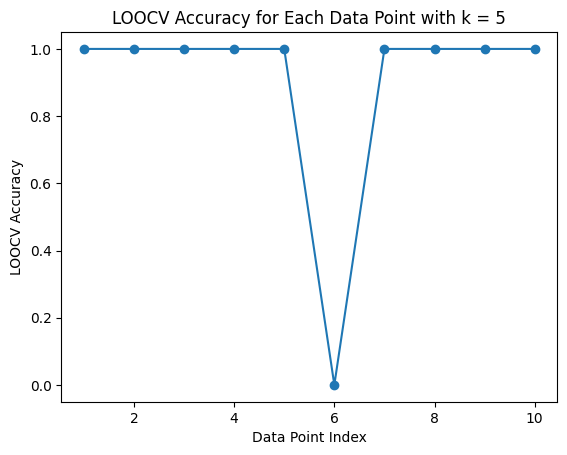

Optimal k: 1


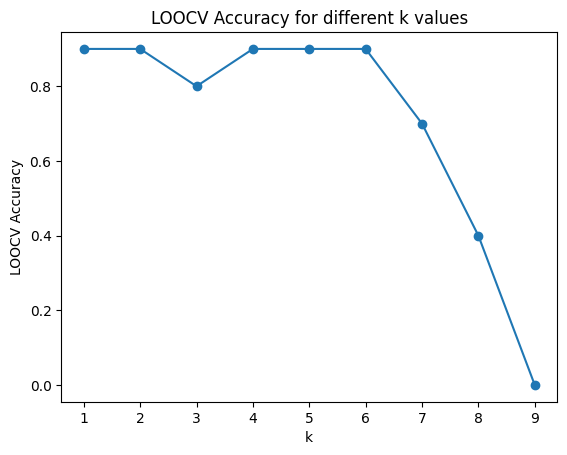

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

# Define the dataset with propellant age, storage temperature, and pass/fail status
dataset = np.array([
    [15.5, 40, 0],
    [23.75, 23.25, 0],
    [8, 17, 1],
    [17, 21, 0],
    [5.5, 10, 1],
    [19, 12, 1],
    [24, 20, 0],
    [2.5, 12, 1],
    [7.5, 15, 1],
    [11, 26, 0]
])

# Extract features (age and temperature) and labels (pass/fail status)
features = dataset[:, :2]
labels = dataset[:, 2]

# Create a kNN classifier with k = 5
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model on the dataset
knn.fit(features, labels)

# Initialize variables to find the plot boundaries
min_x = features[0][0]
min_y = features[0][1]
max_x = features[0][0]
max_y = features[0][1]

# Loop through the dataset to find the min and max values for age and temperature
for it in dataset:
    min_x = min(min_x, it[0])
    min_y = min(min_y, it[1])
    max_x = max(max_x, it[0])
    max_y = max(max_y, it[1])

# Adjust boundaries slightly for better visualization
min_x = min_x - 1
min_y = min_y - 1
max_x = max_x + 1
max_y = max_y + 1

# Calculate resolution for the mesh grid
# The values 1920 and 1080 are chosen to match a typical monitor resolution of 1920x1080 pixels.
# This ensures that if the graph is displayed full-screen on such a monitor, each pixel on the screen
# corresponds to a single point in the mesh grid, providing the most accurate and detailed visual representation.
resolution_x = (max_x - min_x) / 1920
resolution_y = (max_y - min_y) / 1080

# Generate a list of x and y values based on the resolution
values_x = []
values_y = []
for i in range(int((max_x - min_x) / resolution_x)):
    values_x.append(min_x + i * resolution_x)
for i in range(int((max_y - min_y) / resolution_y)):
    values_y.append(min_y + i * resolution_y)

# Create a mesh grid based on the x and y values
xx, yy = np.meshgrid(values_x, values_y)

# Predict the pass/fail status for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Plot the decision boundary and data points

plt.figure()

# Define vibrant colors for decision regions
vibrant_red = '#FF0000'  # Bright Red
vibrant_green = '#00FF00'  # Bright Green

# Create a colormap with vibrant colors
cmap = ListedColormap([vibrant_red, vibrant_green])

# Create the contour plot with the custom colormap for decision boundaries
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

# Scatter plot with original colors for data points
plt.scatter(features[:, 0], features[:, 1], c=labels, edgecolor='k', cmap=plt.cm.Paired)

# Create a custom legend
plt.scatter([], [], c=vibrant_red, edgecolor='k', label='Label = 0', marker='o')
plt.scatter([], [], c=vibrant_green, edgecolor='k', label='Label = 1', marker='o')

# Add legend
plt.legend()

# Labels and title
plt.xlabel('Propellant age (Weeks)')
plt.ylabel('Storage temperature (°C)')
plt.title(f'Decision Boundary with k = {k}')

# Show the plot
plt.show()

# Perform Leave-One-Out Cross-Validation (LOOCV)
loo = LeaveOneOut()
accuracy = []

# Loop through each LOOCV split
for train_index, test_index in loo.split(features):
    f_train, f_test = features[train_index], features[test_index]
    l_train, l_test = labels[train_index], labels[test_index]
    knn.fit(f_train, l_train)
    l_pred = knn.predict(f_test)
    accuracy.append(accuracy_score(l_test, l_pred))

# Calculate the average LOOCV accuracy
average_accuracy = np.mean(accuracy)
print(f'LOOCV Accuracy with k = {k}: {average_accuracy:.3f}')

# Plot the LOOCV results for each data point
plt.figure()
plt.plot(range(1, len(accuracy) + 1), accuracy, marker='o')
plt.xlabel('Data Point Index')
plt.ylabel('LOOCV Accuracy')
plt.title(f'LOOCV Accuracy for Each Data Point with k = {k}')
plt.show()

# Find the optimum k value by evaluating different k values
accuracies = []
k_values = range(1, 10)

# Loop through k values and calculate LOOCV accuracy for each
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy = []
    for train_index, test_index in loo.split(features):
        f_train, f_test = features[train_index], features[test_index]
        l_train, l_test = labels[train_index], labels[test_index]
        knn.fit(f_train, l_train)
        l_pred = knn.predict(f_test)
        accuracy.append(accuracy_score(l_test, l_pred))
    accuracies.append(np.mean(accuracy))

# Determine the k with the highest LOOCV accuracy
optimal_k = k_values[np.argmax(accuracies)]
print(f'Optimal k: {optimal_k}')

# Plot the LOOCV accuracy for different k values
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('LOOCV Accuracy')
plt.title('LOOCV Accuracy for different k values')
plt.show()
